In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [53]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [54]:
iris_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
iris_df['Species'] = iris.target_names[iris.target]

In [57]:
from sklearn.datasets import load_iris

# Data Exploration
print("Dataset Information:")
print(iris_df.info())
print("\nSummary Statistics:")
print(iris_df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%   

In [59]:
# Checking for null values
print("\nNull Values:")
print(iris_df.isna().sum())


Null Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


In [60]:
# Class distribution in the DataFrame
print("\nClass Distribution:")
print(iris_df['Species'].value_counts())



Class Distribution:
setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64


In [37]:
 # Exploratory Data Analysis
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [38]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

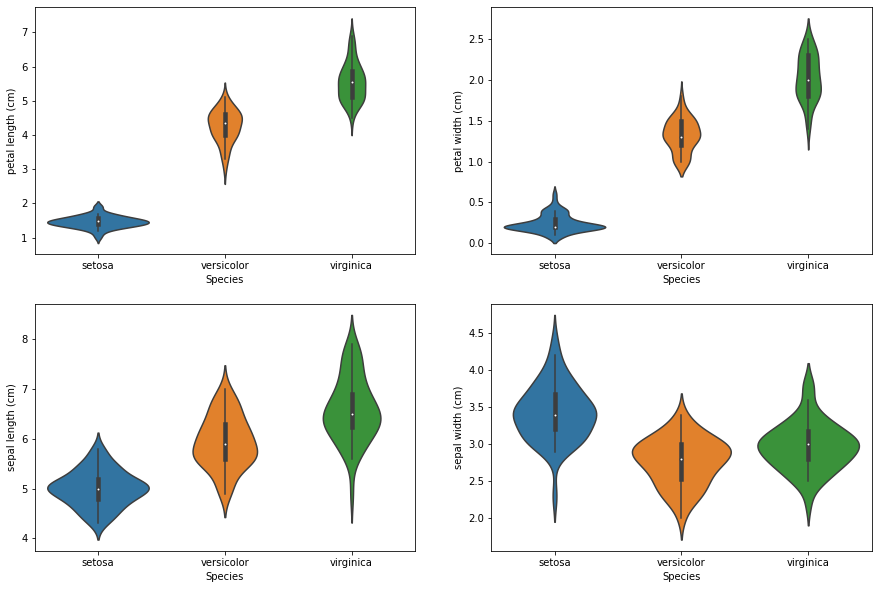

In [39]:
# Visualizations
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='petal length (cm)', data=iris_df)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='petal width (cm)', data=iris_df)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='sepal length (cm)', data=iris_df)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='sepal width (cm)', data=iris_df)

plt.show()


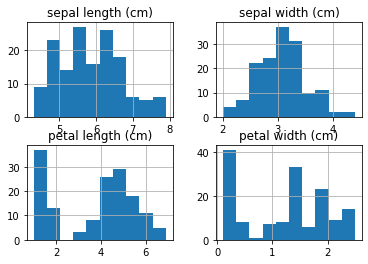

In [62]:
iris_df.hist()
plt.show()

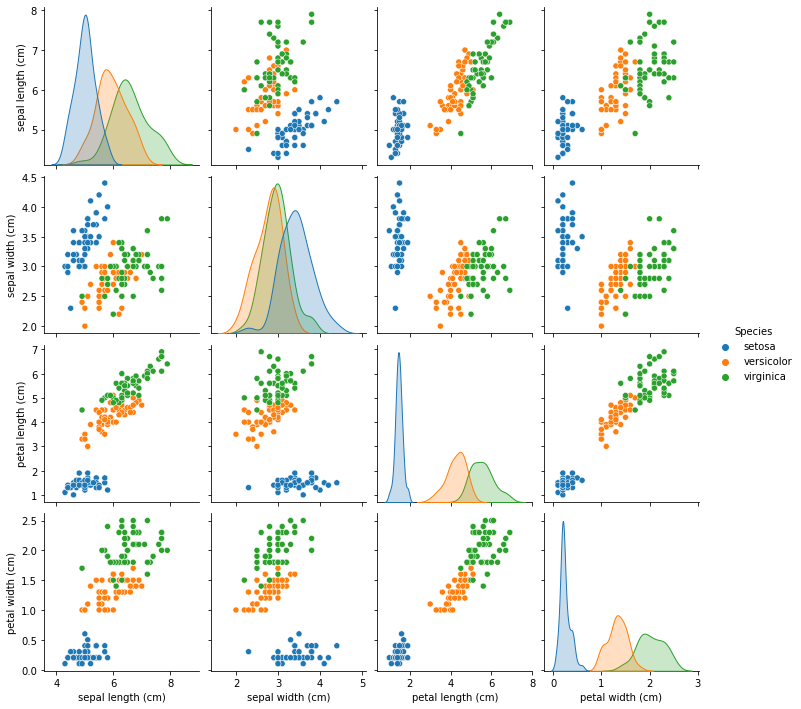

In [76]:
sns.pairplot(iris_df,hue='Species');

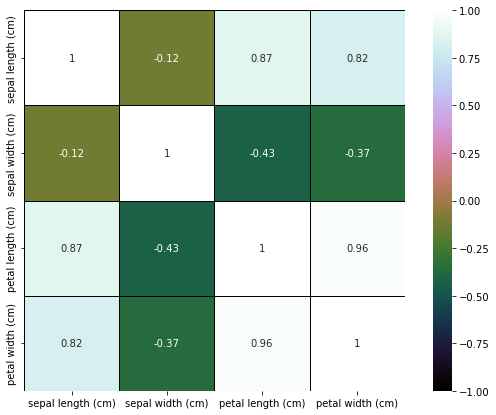

In [77]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris_df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

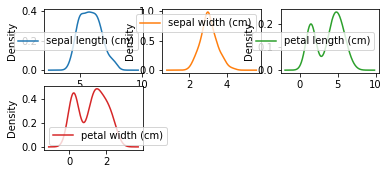

In [63]:
iris_df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

In [64]:
#Correlation 
corr_mat = iris_df.corr()
print(corr_mat)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [40]:
# Data Preprocessing
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- `X` and `y`:
  - `X` contains the feature values (independent variables) that the model will use to make predictions.
  - `y` contains the corresponding target labels (dependent variable) that the model will try to predict.

- `train_test_split`:
  - `train_test_split` is a function from scikit-learn that splits the dataset into two sets: a training set and a testing set.
  - The first two arguments (`X` and `y`) are the data to be split.
  - `test_size=0.2` specifies that 20% of the data should be used as the test set, and the remaining 80% will be used as the training set.
  - `random_state=42` is used to ensure reproducibility. Setting a random seed ensures that the split is the same every time the code is run, which can be important for reproducibility and debugging.

- Outputs:
  - `X_train` and `y_train` are the feature and target variables for the training set, respectively.
  - `X_test` and `y_test` are the feature and target variables for the test set, respectively.



In [65]:
# Check for any issues with the training data
print("\nUnique Labels in Training Data:")
print(y_train.unique())


Unique Labels in Training Data:
['setosa' 'versicolor' 'virginica']


In [66]:
# Check for any issues with the test data
print("\nUnique Labels in Test Data:")
print(y_test.unique())


Unique Labels in Test Data:
['versicolor' 'setosa' 'virginica']


In [67]:
# Model Training using Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

1. Initialize the Decision Tree Classifier:
   - Create an instance of the `DecisionTreeClassifier` class.
   - Set `random_state` to ensure reproducibility, making the random splits consistent across runs.

2. Training the Model:
   - Use the `fit` method to train the Decision Tree classifier on the training data.
   - The training data consists of feature values (`X_train`) and corresponding target labels (`y_train`).

3. Making Predictions:
   - After training, use the trained model to make predictions on new, unseen data.
   - The test set is used for prediction, containing feature values (`X_test`) for which we want to predict target labels.
   - The predictions are stored in a variable (e.g., `y_pred`), representing the model's predictions for the test set.


In [68]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)

1. Accuracy Calculation:
   - The `accuracy_score` function compares the actual target labels (`y_test`) with the predicted labels (`y_pred`) and calculates the accuracy of the model.
   - Accuracy is the ratio of correctly predicted instances to the total number of instances in the test set.
   - It provides a general measure of how well the model performs across all classes.

2. Classification Report:
   - The `classification_report` function generates a detailed report that includes various metrics for each class in the target variable.
   - It includes metrics such as precision, recall, and F1-score for each class, along with the overall accuracy.
   - The `target_names` parameter is used to specify the names of the classes, ensuring the report is labeled appropriately.

These two steps are essential for understanding the performance of the machine learning model:

- Accuracy: Provides an overall measure of how often the model's predictions match the actual labels. However, accuracy alone may not be sufficient, especially if the classes are imbalanced.

- Classification Report: Offers a more detailed breakdown of the model's performance, providing insights into how well it performs for each individual class. It includes metrics that consider true positives, false positives, and false negatives, giving a more nuanced understanding of the model's strengths and weaknesses.

Together, accuracy and the classification report help assess the model's overall performance and its ability to correctly classify instances for each class in the dataset.


In [69]:
# Print Results for Decision Tree
print("Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Decision Tree Classifier Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
# Model Training using Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)

1. Initialize the Gaussian Naive Bayes Classifier:
   - Creates an instance of the Gaussian Naive Bayes classifier from scikit-learn.

2. Training the Model:
   - Uses the `fit` method to train the Gaussian Naive Bayes classifier on the training data.
   - `X_train` contains the feature values for the training set.
   - `y_train` contains the corresponding target labels for the training set.

3. Making Predictions:
   - Uses the trained Gaussian Naive Bayes model to make predictions on the test set.
   - `X_test` contains the feature values for the test set.
   - `y_pred_nb` stores the predicted labels for the test set.




In [46]:
# Model Evaluation for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb, target_names=iris.target_names)

In [47]:
# Print Results for Naive Bayes
print("\nNaive Bayes Classifier Results:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("Classification Report:")
print(classification_rep_nb)



Naive Bayes Classifier Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [48]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [25]:
# Model Evaluation for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg, target_names=iris.target_names)

In [26]:
# Print Results for Logistic Regression
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print("Classification Report:")
print(classification_rep_logreg)


Logistic Regression Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
from sklearn.model_selection import cross_val_score

# Example using Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9733333333333334


In [74]:
# Model Training using Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Model Evaluation for Support Vector Machines
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc, target_names=iris.target_names)

# Print Results for Support Vector Machines
print("\nSupport Vector Machines Classifier Results:")
print(f"Accuracy: {accuracy_svc:.2f}")
print("Classification Report:")
print(classification_rep_svc)


Support Vector Machines Classifier Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [50]:
# Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Model Evaluation for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn, target_names=iris.target_names)

# Print Results for KNN
print("\nKNN Classifier Results:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(classification_rep_knn)



KNN Classifier Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [75]:
# Cross-Validation
logreg_model = LogisticRegression(max_iter=1000)
models = [logreg_model, SVC(), KNeighborsClassifier(n_neighbors=5), GaussianNB(), DecisionTreeClassifier()]

for model in models:
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("\nCross-Validation Scores for", model.__class__.__name__)
    print(cv_scores)
    print("Mean CV Accuracy:", cv_scores.mean())



Cross-Validation Scores for LogisticRegression
[0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9733333333333334

Cross-Validation Scores for SVC
[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean CV Accuracy: 0.9666666666666666

Cross-Validation Scores for KNeighborsClassifier
[0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9733333333333334

Cross-Validation Scores for GaussianNB
[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV Accuracy: 0.9533333333333334

Cross-Validation Scores for DecisionTreeClassifier
[0.96666667 0.96666667 0.9        1.         1.        ]
Mean CV Accuracy: 0.9666666666666668


In [79]:
# So i will use Logistic Regression to train the model